### Importing Libraries

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, 
ExtraTreesClassifier, ExtraTreesClassifier)
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("C:/Users/bisht/Downloads/spam.csv", encoding = 'ANSI')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

### Data Cleaning

In [4]:
df.info()

# Column [unnamed 2, 3 and 4 have more than 99 percent data missing]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Dropping last 3 columns

df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Renaming the columns for better grasp of dataset

df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
1318,ham,Ok...
3697,ham,S:)but he had some luck.2 catches put down:)
2436,ham,Btw regarding that we should really try to see...
5097,ham,Sorry about that this is my mates phone and i ...
1951,ham,Haha... Really oh no... How? Then will they de...


In [7]:
# Encoding target col. Since we are targetting target col we will use labelencoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df.target)
df.sample(5)

,target,text
4263,0,She just broke down a list of reasons why nobo...
887,0,Y dun cut too short leh. U dun like ah? She fa...
664,0,Yes baby! We can study all the positions of th...
2365,0,Ok try to do week end course in coimbatore.
5507,0,I want to be inside you every night...


In [8]:
# Checking for missing values

df.isna().sum()

target    0
text      0
dtype: int64

In [9]:
# Checking for duplicate values

df.duplicated().sum()


# We have less than 10% of duplicated values

np.int64(403)

In [10]:
# Removing the duplicated values

df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(5169, 2)

### EDA

In [12]:
df.target.value_counts()

# We have very uneven dataset here

target
0    4516
1     653
Name: count, dtype: int64

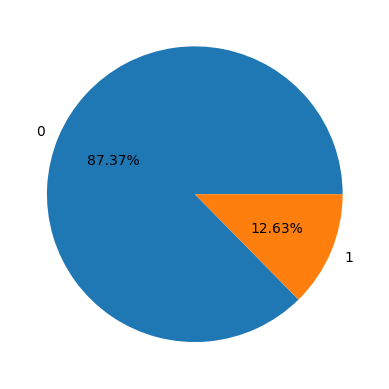

In [13]:
# Visualizing the target column to get more clarity on this uneven distribution of data between the target classes

plt.pie(df.target.value_counts(), labels = df.target.unique(), autopct = '%0.2f%%')
plt.show()

# Here 0 is for ham and 1 is for spam

In [14]:
# Creating a new column to that tells us how many characters are there in every email text we have for each row

df['num_char'] = df.text.apply(len)
df.sample(5)

,target,text,num_char
2063,1,"URGENT! Your mobile No *********** WON a å£2,0...",159
4169,0,"Mmmmmm ... I love you,so much, Ahmad ... I can...",157
2819,1,INTERFLORA - åÒIt's not too late to order Inte...,137
1797,0,Can i get your opinion on something first?,42
3342,0,"I haven't forgotten you, i might have a couple...",91


In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bisht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
# Tokenizing every word to get the number of words in each email text we have

df['num_words'] = df.text.apply(lambda x : len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,num_char,num_words
3242,0,Pls accept me for one day. Or am begging you c...,63,15
5531,0,Compliments to you. Was away from the system. ...,60,14
215,0,Finally the match heading towards draw as your...,58,10
5252,0,You do your studies alone without anyones help...,77,17
2401,1,Babe: U want me dont u baby! Im nasty and have...,152,41


In [17]:
# Tokenizing every sentence to get the number of sentences in each email text we have

df['num_sentences'] = df.text.apply(lambda x : len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_char,num_words,num_sentences
218,0,I have to take exam with march 3,32,8,1
117,0,Goodo! Yes we must speak friday - egg-potato r...,72,14,2
5564,0,Why don't you wait 'til at least wednesday to ...,67,16,1
928,0,Oh all have to come ah?,23,7,1
2068,0,Its hard to believe things like this. All can ...,99,21,2


In [18]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [19]:
# Statistical information about ham messages

df[df['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# Statistical information about spam messages

df[df['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


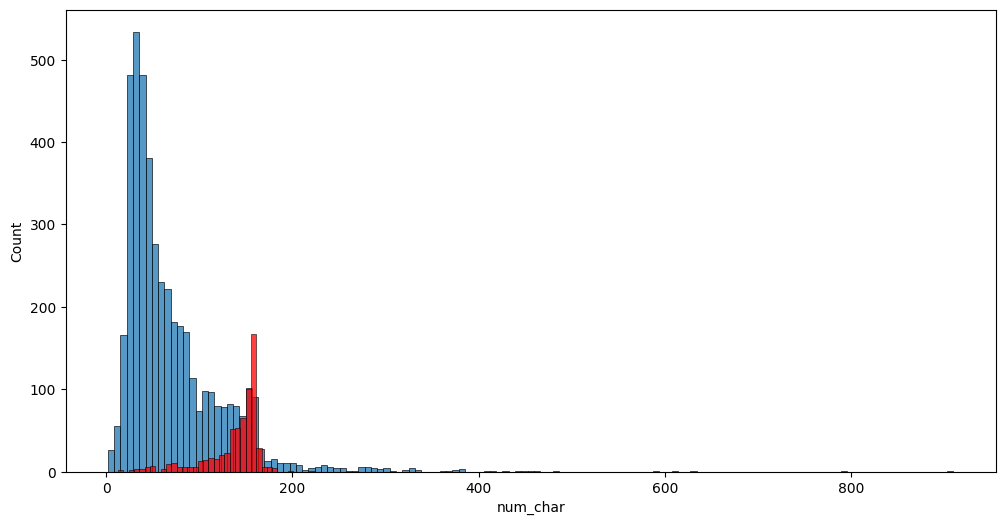

In [21]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color = 'red')
plt.show()

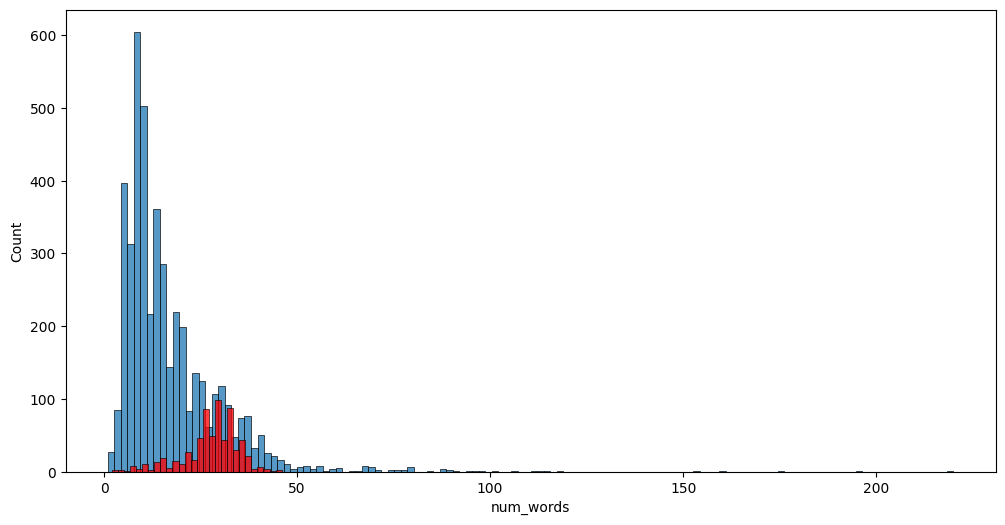

In [22]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')
plt.show()

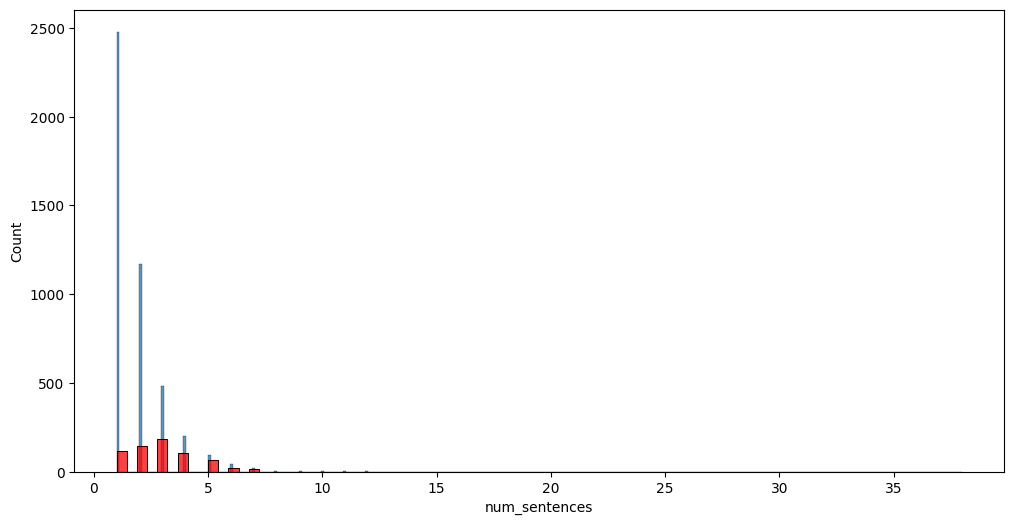

In [23]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')
plt.show()

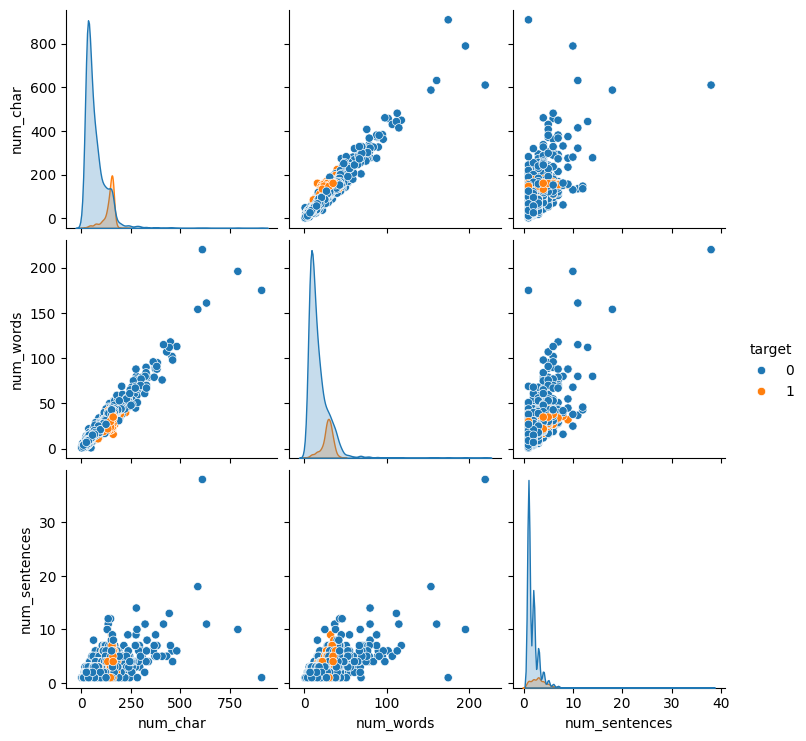

In [24]:
sns.pairplot(df, hue = 'target')
plt.show()

In [25]:
# Checking correlation between all the numerical columns

df.select_dtypes(include = [np.number]).corr()

,target,num_char,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


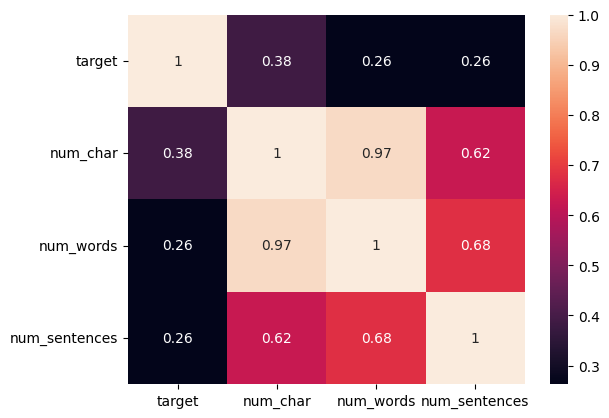

In [26]:
# Visualizing the correlations between the columns

sns.heatmap(df.select_dtypes(include = [np.number]).corr(), annot = True)
plt.show()

### Data Preprocessing

In [27]:
df.sample(10)

,target,text,num_char,num_words,num_sentences
2164,0,"Nothing really, just making sure everybody's u...",56,11,1
2515,0,Bognor it is! Should be splendid at this time ...,54,13,2
2954,0,Id have to check but there's only like 1 bowls...,57,13,1
2612,0,Yes. It's all innocent fun. O:-),32,12,3
3368,0,Sorry i've not gone to that place. I.ll do so ...,69,17,3
5260,0,If anyone calls for a treadmill say you'll buy...,127,34,3
2007,0,Hi here. have birth at on the to at 8lb 7oz....,81,19,3
3178,0,Does cinema plus drink appeal tomo? * Is a fr ...,92,22,2
1536,0,How's it feel? Mr. Your not my real Valentine ...,91,23,4
4216,0,Will be office around 4 pm. Now i am going hos...,52,13,2


In [28]:
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # lower casing the text
    text = nltk.word_tokenize(text)  # tokenizing the text

    y = [] 
    for i in text:   # removing Special Char
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:  # removing Stop words and Punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [29]:
transform_text("I am trying to test this function if it will work properly or not. Let's see")

'tri test function work properli let see'

In [30]:
df.text[7]

"As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"

In [31]:
transform_text(df.text[7])

'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun'

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)
df.sample(10)

,target,text,num_char,num_words,num_sentences,transformed_text
2891,0,Babe? You said 2 hours and it's been almost 4 ...,73,18,2,babe said 2 hour almost 4 internet
4884,0,Poor girl can't go one day lmao,31,8,1,poor girl ca go one day lmao
4858,0,"Hey, a guy I know is breathing down my neck to...",121,31,1,hey guy know breath neck get bud anyway abl ge...
5463,0,U GOIN OUT 2NITE?,17,5,1,u goin 2nite
564,0,"Fuck babe ... I miss you already, you know ? C...",146,36,6,fuck babe miss alreadi know ca let send money ...
2417,0,Oh... Lk tt den we take e one tt ends at cine ...,81,21,1,oh lk tt den take e one tt end cine lor dun wa...
4035,0,How are you holding up?,23,6,1,hold
804,0,K I'll be there before 4.,25,8,1,k 4
3155,0,Long time. You remember me today.,33,8,2,long time rememb today
1879,1,U have a secret admirer who is looking 2 make ...,132,26,1,u secret admir look 2 make contact r reveal th...


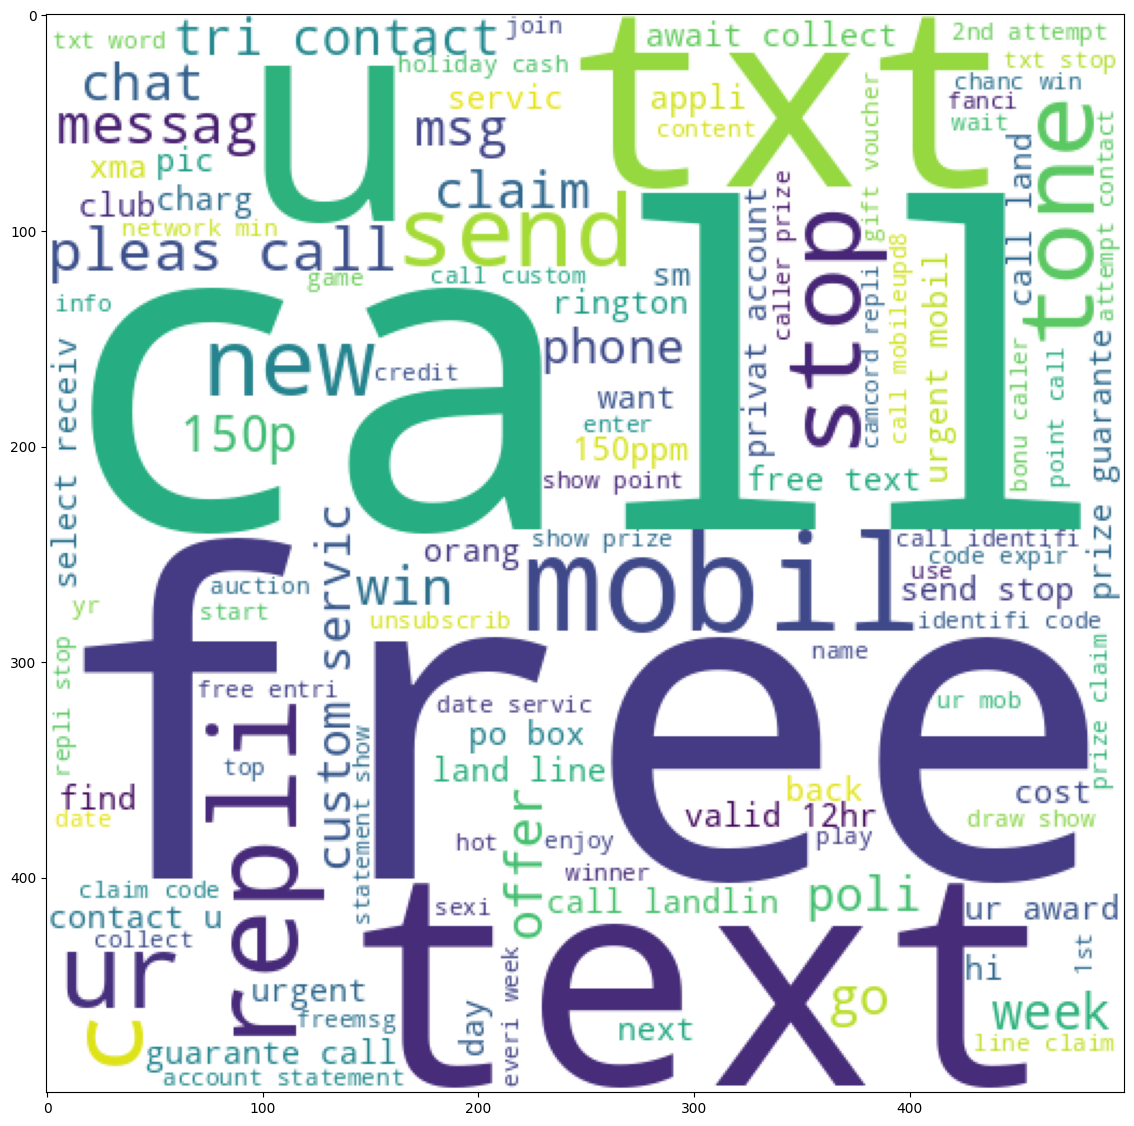

In [33]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df.target == 1]['transformed_text'].str.cat(sep = ' '))

plt.figure(figsize = (14, 14))
plt.imshow(spam_wc)

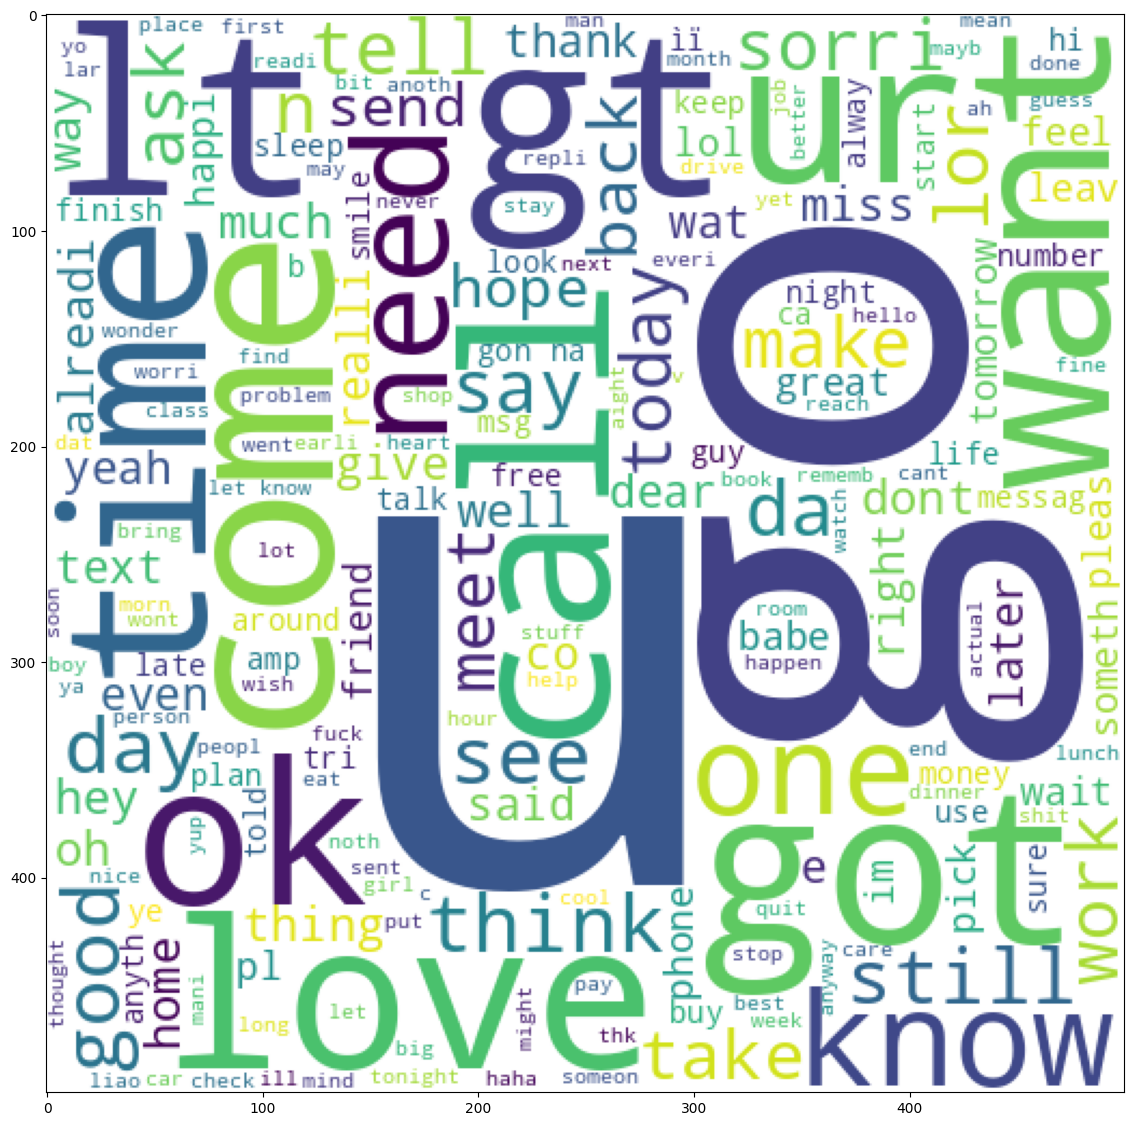

In [34]:
ham_wc = wc.generate(df[df.target == 0]['transformed_text'].str.cat(sep = ' '))

plt.figure(figsize = (14, 14))
plt.imshow(ham_wc)

In [35]:
df[df.target == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [36]:
spam_corpus = []
for msg in df[df.target == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [37]:
len(spam_corpus)

9939

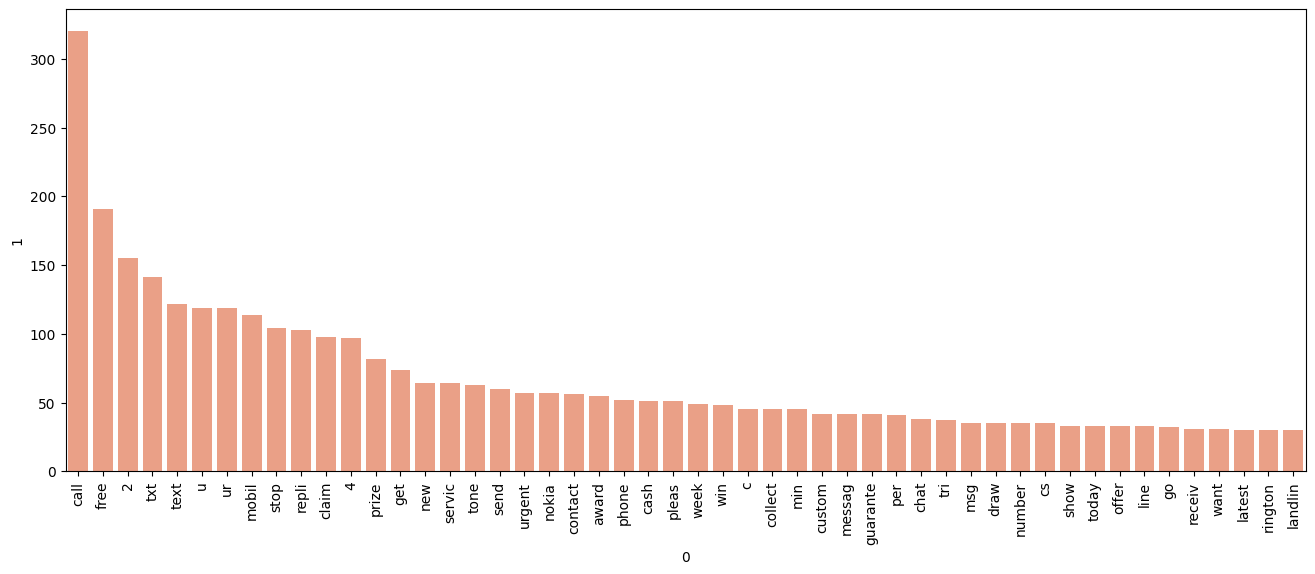

In [38]:
plt.figure(figsize = (16, 6))
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(50))[0], 
            y = pd.DataFrame(Counter(spam_corpus).most_common(50))[1], color = '#FB9876')
plt.xticks(rotation = 'vertical')
plt.show()

In [39]:
ham_corpus = []
for msg in df[df.target == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

print(ham_corpus)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 

In [40]:
len(ham_corpus)

35404

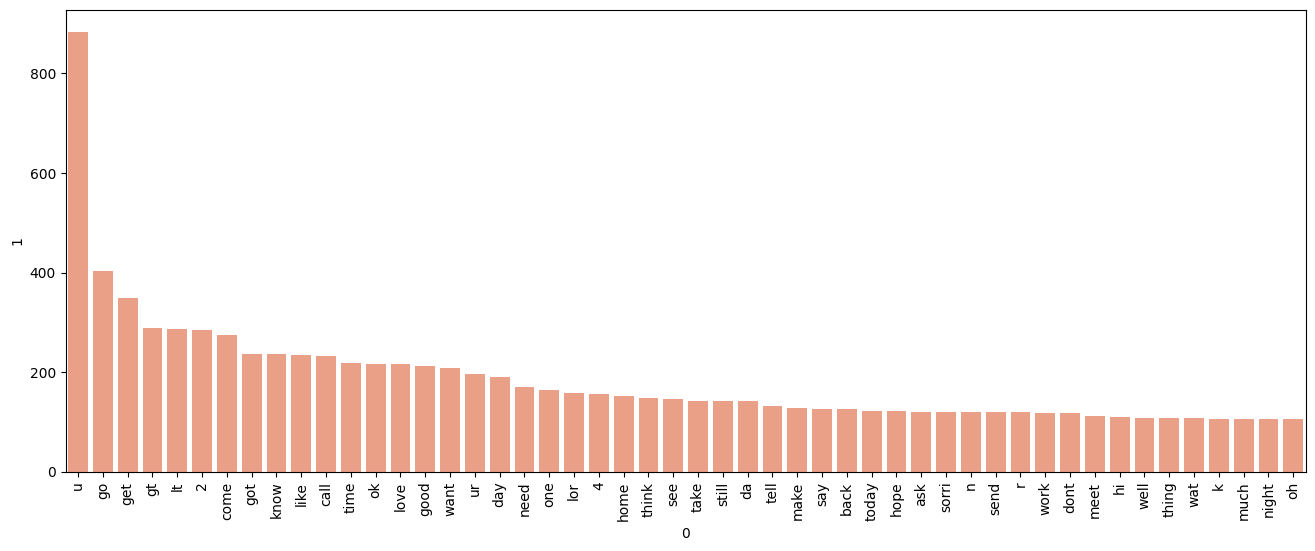

In [41]:
plt.figure(figsize = (16, 6))
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(50))[0], 
            y = pd.DataFrame(Counter(ham_corpus).most_common(50))[1], color = '#FB9876')
plt.xticks(rotation = 'vertical')
plt.show()

### Model Building

In [45]:
cv = CountVectorizer()

X = cv.fit_transform(df['transformed_text']).toarray()
print(X.shape)

y = df.target.values
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

(5169, 6708)
(5169,)


In [49]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)


print(f'Accuracy Score for Gaussian NB = {accuracy_score(y_test, y_pred1)}')
print(f'Confusion Matrix for Gaussian NB = \n{confusion_matrix(y_test, y_pred1)}')
print(f'Precision Score for Gaussian NB = {precision_score(y_test, y_pred1)}')
print('----------------------------------------------------------------------')
print(f'Accuracy Score for Multinomial NB = {accuracy_score(y_test, y_pred2)}')
print(f'Confusion Matrix for Multinomial NB = \n{confusion_matrix(y_test, y_pred2)}')
print(f'Precision Score for Multinomial NB = {precision_score(y_test, y_pred2)}')
print('----------------------------------------------------------------------')
print(f'Accuracy Score for Bernaulli NB = {accuracy_score(y_test, y_pred3)}')
print(f'Confusion Matrix for Bernaulli NB = \n{confusion_matrix(y_test, y_pred3)}')
print(f'Precision Score for Bernaulli NB = {precision_score(y_test, y_pred3)}')

Accuracy Score for Gaussian NB = 0.8800773694390716
Confusion Matrix for Gaussian NB = 
[[792 104]
 [ 20 118]]
Precision Score for Gaussian NB = 0.5315315315315315
----------------------------------------------------------------------
Accuracy Score for Multinomial NB = 0.9642166344294004
Confusion Matrix for Multinomial NB = 
[[871  25]
 [ 12 126]]
Precision Score for Multinomial NB = 0.8344370860927153
----------------------------------------------------------------------
Accuracy Score for Bernaulli NB = 0.9700193423597679
Confusion Matrix for Bernaulli NB = 
[[893   3]
 [ 28 110]]
Precision Score for Bernaulli NB = 0.9734513274336283


In [51]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)

y = df.target.values
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

(5169, 6708)
(5169,)


In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)


print(f'Accuracy Score for Gaussian NB = {accuracy_score(y_test, y_pred1)}')
print(f'Confusion Matrix for Gaussian NB = \n{confusion_matrix(y_test, y_pred1)}')
print(f'Precision Score for Gaussian NB = {precision_score(y_test, y_pred1)}')
print('----------------------------------------------------------------------')
print(f'Accuracy Score for Multinomial NB = {accuracy_score(y_test, y_pred2)}')
print(f'Confusion Matrix for Multinomial NB = \n{confusion_matrix(y_test, y_pred2)}')
print(f'Precision Score for Multinomial NB = {precision_score(y_test, y_pred2)}')
print('----------------------------------------------------------------------')
print(f'Accuracy Score for Bernaulli NB = {accuracy_score(y_test, y_pred3)}')
print(f'Confusion Matrix for Bernaulli NB = \n{confusion_matrix(y_test, y_pred3)}')
print(f'Precision Score for Bernaulli NB = {precision_score(y_test, y_pred3)}')

Accuracy Score for Gaussian NB = 0.8762088974854932
Confusion Matrix for Gaussian NB = 
[[793 103]
 [ 25 113]]
Precision Score for Gaussian NB = 0.5231481481481481
----------------------------------------------------------------------
Accuracy Score for Multinomial NB = 0.9593810444874274
Confusion Matrix for Multinomial NB = 
[[896   0]
 [ 42  96]]
Precision Score for Multinomial NB = 1.0
----------------------------------------------------------------------
Accuracy Score for Bernaulli NB = 0.9700193423597679
Confusion Matrix for Bernaulli NB = 
[[893   3]
 [ 28 110]]
Precision Score for Bernaulli NB = 0.9734513274336283


In [57]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [59]:
clfs = {'SVC' : svc, 'KNC' : knc, 'MNB' : mnb, 'DTC' : dtc, 'LRC' : lrc, 'RFC' : rfc, 
        'ABC' : abc, 'BC' : bc, 'ETC' : etc, 'GBDT' : gbdt, 'XBG' : xgb}

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [60]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [61]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy = ", current_accuracy)
    print("Precision = ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy =  0.9729206963249516
Precision =  0.9741379310344828
For  KNC
Accuracy =  0.9003868471953579
Precision =  1.0
For  MNB
Accuracy =  0.9593810444874274
Precision =  1.0
For  DTC
Accuracy =  0.937137330754352
Precision =  0.8543689320388349
For  LRC
Accuracy =  0.9516441005802708
Precision =  0.94
For  RFC
Accuracy =  0.971953578336557
Precision =  1.0
For  ABC
Accuracy =  0.9245647969052224
Precision =  0.8409090909090909
For  BC
Accuracy =  0.9584139264990329
Precision =  0.8625954198473282
For  ETC
Accuracy =  0.9729206963249516
Precision =  0.9824561403508771
For  GBDT
Accuracy =  0.9526112185686654
Precision =  0.9238095238095239
For  XBG
Accuracy =  0.9748549323017408
Precision =  0.9516129032258065


In [62]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 
                               'Precision' : precision_scores}).sort_values('Precision',ascending=False)

In [63]:
performance_df

,Algorithm,Accuracy,Precision
1,KNC,0.900387,1.000000
2,MNB,0.959381,1.000000
5,RFC,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,XBG,0.974855,0.951613
4,LRC,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BC,0.958414,0.862595
3,DTC,0.937137,0.854369


In [66]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KNC,Accuracy,0.900387
1,MNB,Accuracy,0.959381
2,RFC,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,XBG,Accuracy,0.974855
6,LRC,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,BC,Accuracy,0.958414
9,DTC,Accuracy,0.937137


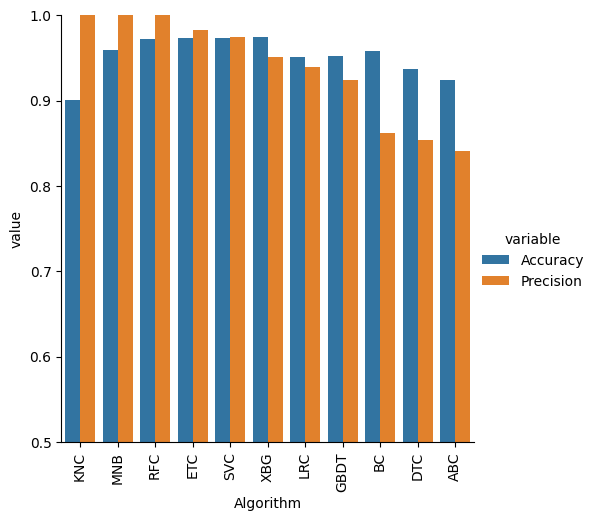

In [67]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 90)
plt.show()

### Evaluation

### Improvement

### Website Building

### Deployment